**Load Packages and Libraries**

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix

**Data Loading and Preprocessing**


In [215]:
train_data = pd.read_csv('/content/sample_data/netflix_titles.csv')
train_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [216]:
train_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [217]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [218]:
train_data.shape

(8807, 12)

In [219]:
train_data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [220]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Rating is object here we need to change that


In [221]:
# Step 1: Ensure rating is numeric (if not already)
rating_map = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'R': 4,
    'NC-17': 5,
    'TV-Y': 1,
    'TV-Y7': 2,
    'TV-G': 2,
    'TV-PG': 3,
    'TV-14': 4,
    'TV-MA': 5
}
train_data['rating_num'] = train_data['rating'].map(rating_map)

In [ ]:
# Fill missing values in 'director' with a default value (e.g., 0)
train_data['director'].fillna('Unknown', inplace=True)
# Fill missing values in 'cast' with a default value (e.g., 0)
train_data['cast'].fillna('Unknown', inplace=True)
# Fill missing values in 'country' with an empty string
train_data['country'].fillna('Unknown', inplace=True)
# Fill missing values in 'date_added' with a default value (e.g., 'Unknown')
train_data['date_added'].fillna('Unknown', inplace=True)
# Fill missing values in 'rating' with a default value (e.g., 'Unknown')
train_data['rating'].fillna('Unknown', inplace=True)
# Fill missing values in 'duration' with an empty string
train_data['duration'].fillna('Unknown', inplace=True)
# Fill missing values in 'rating_num' with an empty string
train_data['rating_num'].fillna('Unknown', inplace=True)

/tmp/ipython-input-2809275503.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2809275503.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [223]:
train_data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [227]:
# Step 1: Ensure rating is numeric (if not already)
rating_map = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'R': 4,
    'NC-17': 5,
    'TV-Y': 1,
    'TV-Y7': 2,
    'TV-G': 2,
    'TV-PG': 3,
    'TV-14': 4,
    'TV-MA': 5
}
train_data['rating_num'] = train_data['rating'].map(rating_map)

In [228]:
train_data.duplicated().sum()

np.int64(0)

In [229]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8807 non-null   object 
 1   type          8807 non-null   object 
 2   title         8807 non-null   object 
 3   director      8807 non-null   object 
 4   cast          8807 non-null   object 
 5   country       8807 non-null   object 
 6   date_added    8807 non-null   object 
 7   release_year  8807 non-null   int64  
 8   rating        8807 non-null   object 
 9   duration      8807 non-null   object 
 10  listed_in     8807 non-null   object 
 11  description   8807 non-null   object 
 12  rating_num    8711 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 894.6+ KB


**Correlation between Rating and Release year**

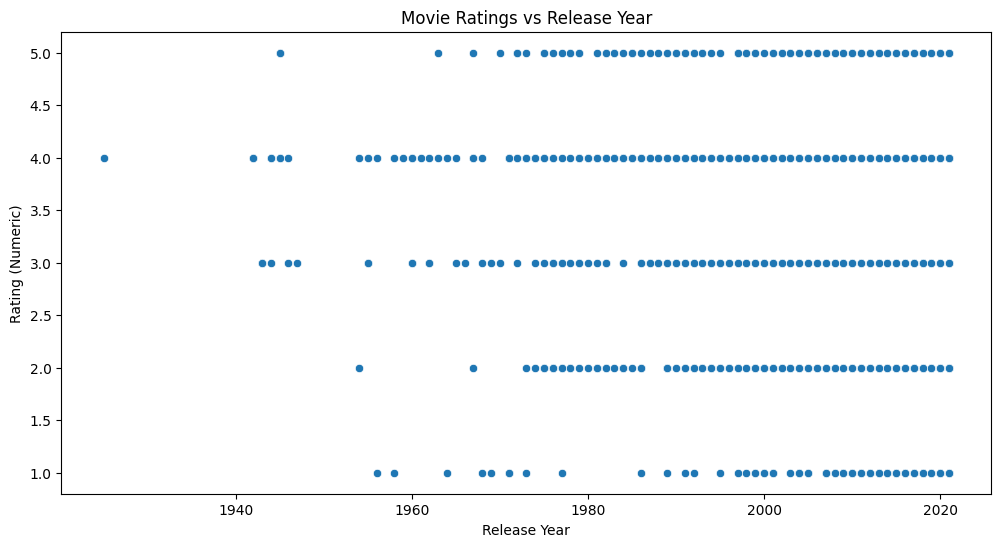

In [230]:

correlation = train_data['release_year'].corr(train_data['rating_num'])
plt.figure(figsize=(12,6))
sns.scatterplot(x='release_year', y='rating_num', data=train_data)
plt.title('Movie Ratings vs Release Year')
plt.xlabel('Release Year')
plt.ylabel('Rating (Numeric)')
plt.show()

**Identify Top Rated movies**

In [231]:
top_movies = train_data.sort_values(by='rating_num', ascending=False)

# Display top 100 movies
top_100_movies = top_movies[['title', 'release_year', 'rating_num']].head(100)
print(top_100_movies)

                       title  release_year  rating_num
8801                 Zinzana          2015         5.0
8769  Y.M.I.: Yeh Mera India          2008         5.0
32             Sex Education          2020         5.0
31        Chicago Party Aunt          2021         5.0
19                    Jaguar          2021         5.0
...                      ...           ...         ...
8467              The Prison          2017         5.0
8463  The President's Barber          2004         5.0
8460              The Player          2012         5.0
8459                The Plan          2015         5.0
125                  Q-Force          2021         5.0

[100 rows x 3 columns]


**EDA**

USE BAR CHARTS TO SHOW DISTRIBUTION OF MOVIES

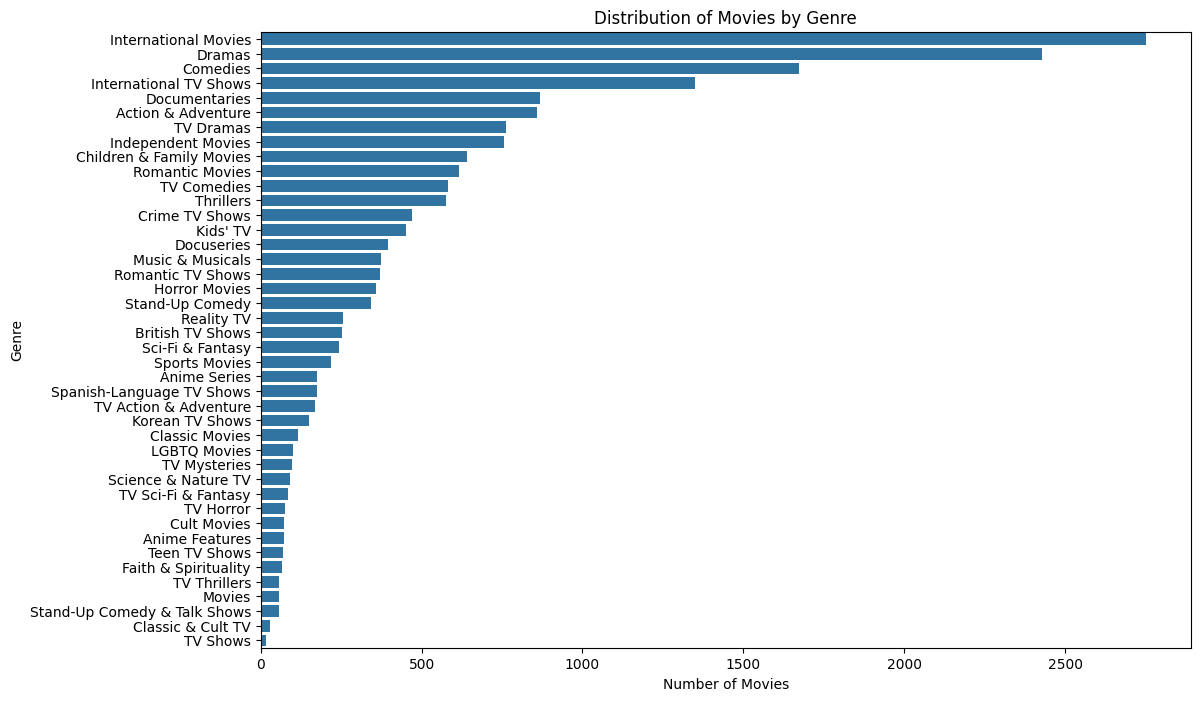

In [232]:
df_exploded = train_data.assign(listed_in=train_data['listed_in'].str.split(', ')).explode('listed_in')

# Plot distribution of movies by genre
plt.figure(figsize=(12,8))
sns.countplot(y='listed_in', data=df_exploded, order=df_exploded['listed_in'].value_counts().index)
plt.title('Distribution of Movies by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

**Data Cleaning and Tags Creations**

In [233]:
train_data['director'] = train_data['director'].fillna('Unknown')
train_data['cast'] = train_data['cast'].fillna('Unknown')
train_data['description'] = train_data['description'].fillna('')
train_data['title'] = train_data['title'].fillna('')

In [234]:
train_data[['director','title','description','cast']] = train_data[['director','title','description','cast']].astype(str)

In [157]:
import pandas as pd

# Columns to create tags from
columns_to_extract_tags_from = ['title', 'cast', 'description', 'director']

# Function to clean text and extract tags
def create_tags(text):
    if pd.isna(text):  # Handle NaN
        return ''
    text = str(text).lower()          # Convert to string and lowercase
    words = text.split()              # Split by spaces
    words = [w.strip('.,!?:;"()') for w in words]  # Remove punctuation
    stop_words = set([
        'the','and','a','an','in','of','for','to','with','on','by','at','from','as','is','it','its','this'
    ])
    tags = [w for w in words if w not in stop_words and len(w)>1]  # Remove stopwords and single letters
    return ', '.join(tags)

# Apply to all columns
for col in columns_to_extract_tags_from:
    train_data[col+'_tags'] = train_data[col].apply(create_tags)


In [235]:
train_data['Tags'] = train_data[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)

**Content Base Recommendation system (User Preferences or Items similarities)**

In [236]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [237]:
item_name = 'Kota Factory'

# Make both sides lowercase for case-insensitive search
matching_indices = train_data[train_data['title'].str.lower().str.contains(item_name.lower(), na=False)].index

# Check if any match exists
if len(matching_indices) > 0:
    item_index = matching_indices[0]
    print("Item found at index:", item_index)
else:
    print("Item not found in dataset")

Item found at index: 4


In [238]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))


In [239]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

recommended_items_indics = [x[0] for x in top_similar_items]

In [240]:
train_data.iloc[recommended_items_indics][['title','director','rating_num','duration']]

,title,director,rating_num,duration
2353,Chaman Bahaar,Apurva Dhar Badgaiyann,5.0,112 min
8775,Yeh Meri Family,Unknown,3.0,1 Season
3466,Girls Hostel,Unknown,5.0,1 Season
2472,Betaal,Unknown,5.0,1 Season
2721,Duniya,Ramesh Talwar,4.0,170 min
8124,Super Nani,Indra Kumar,3.0,127 min
8665,Urvi,Pradeep Verma,5.0,121 min
5303,Manoranjan,Shammi Kapoor,4.0,162 min
7932,Sangam,Raj Kapoor,4.0,228 min


In [241]:
item_name = 'Dick Johnson Is Dead'

# Make both sides lowercase for case-insensitive search
matching_indices = train_data[train_data['title'].str.lower().str.contains(item_name.lower(), na=False)].index

# Check if any match exists
if len(matching_indices) > 0:
    item_index = matching_indices[0]
    print("Item found at index:", item_index)
else:
    print("Item not found in dataset")

similar_items = list(enumerate(cosine_similarities_content[item_index]))

similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

recommended_items_indics = [x[0] for x in top_similar_items]

train_data.iloc[recommended_items_indics][['title','director','rating_num','duration']]

Item found at index: 0


,title,director,rating_num,duration
5233,The Death and Life of Marsha P. Johnson,David France,5.0,106 min
7015,How to Be a Player,Lionel C. Martin,4.0,94 min
4877,End Game,"Rob Epstein, Jeffrey Friedman",3.0,40 min
5894,Anjelah Johnson: Not Fancy,Jay Karas,4.0,64 min
3927,New Girl,Unknown,4.0,7 Seasons
7622,Nowhere Boy,Sam Taylor-Johnson,4.0,99 min
3717,Triple Threat,"Jesse V. Johnson, Jesse Johnson",4.0,96 min
6660,Earth's Natural Wonders: Life at the Extremes,Unknown,4.0,1 Season
5540,Win It All,Joe Swanberg,5.0,89 min


**Function To Recommend Products for Content Base**

In [245]:
def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['title'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['title'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_item_indices][['title', 'rating_num', 'description', 'director']]

    return recommended_items_details

In [244]:
train_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,rating_num,Tags
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",3.0,"Dick Johnson Is Dead, Unknown, As her father n..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",5.0,"Blood & Water, Ama Qamata, Khosi Ngema, Gail M..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,5.0,"Ganglands, Sami Bouajila, Tracy Gotoas, Samuel..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",5.0,"Jailbirds New Orleans, Unknown, Feuds, flirtat..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,5.0,"Kota Factory, Mayur More, Jitendra Kumar, Ranj..."


In [171]:
# Save DataFrame to CSV
from google.colab import files


train_data.to_csv('netflix_titles_updated.csv', index=False)  # index=False avoids adding row numbers


In [172]:
files.download('netflix_titles_updated.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>